In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate 
from numba import jit
import pandas as pd

磁场标定

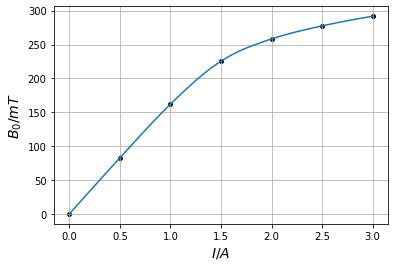

In [151]:
I_calibration = [0.00, 0.50, 1.00, 1.50, 2.00, 2.50, 3.00]
B_calibration = [0.5, 83.2, 162.2, 225.4, 258.3, 277.5, 291.7]

poly_calibration = interpolate.interp1d(I_calibration, B_calibration, 'quadratic')
I_dense = np.linspace(0, 3, 100)
plt.scatter(I_calibration, B_calibration, s = 15, c = 'k')
plt.plot(I_dense, poly_calibration(I_dense))

plt.xlabel("$I/A$", fontsize = 14)
plt.ylabel("$B_0/mT$", fontsize = 14)
plt.grid()
plt.show()

氢核旋磁比

In [5]:
#@jit(nopythoh = True)
def RMS(f, a, b, average):
    sigma, n = 0, len(a)
    for i in range(n):
        sigma += (f(a[i], b[i]) - average)**2
    return (sigma / (n-1))**(1/2)

In [6]:
v_H = [11.19, 11.19, 11.18, 11.18, 11.16, 11.17]
B_H = [267.0, 258.9, 257.2, 256.9, 262.3, 264.0]

f_gamma = lambda x,y: x/y*1e3

gamma_H = f_gamma(np.mean(v_H), np.mean(B_H))
sigma_H = RMS(f_gamma, v_H, B_H, gamma_H)
print("平均值为{:.3f}；标准差为{:.3f}".format(gamma_H, sigma_H))

平均值为42.821；标准差为0.668


氟核旋磁比

In [23]:
v_F = [11.21, 11.20, 11.21, 11.21, 11.19, 11.20]
B_F = [282.2, 281.9, 284.5, 279.3, 279.8, 283.1]

gamma_F = f_gamma(np.mean(v_F), np.mean(B_F))
sigma_F = RMS(f_gamma, v_F, B_F, gamma_F)
print("平均值为{:.3f}；标准差为{:.3f}".format(gamma_F, sigma_F))

平均值为39.756；标准差为0.270


磁滞回线

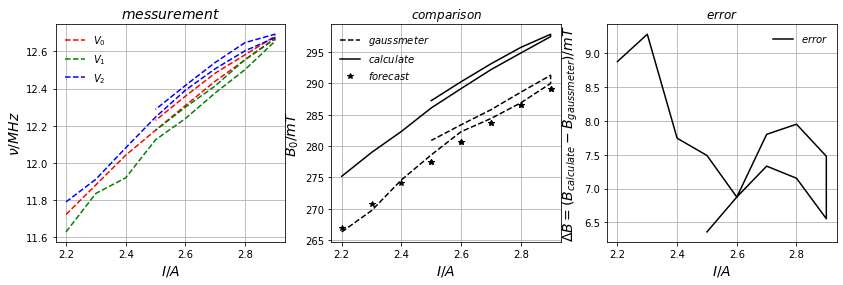

In [152]:
v_0 = [11.7226, 11.8819, 12.0417, 12.1758, 12.3088, 12.4399, 12.5546, 12.6669,
        12.6817, 12.5819, 12.4833, 12.3593, 12.2289]
v_2 = [11.7903, 11.9123, 12.0812, 12.2463, 12.3913, 12.5068, 12.6034, 12.6739, 
        12.6925, 12.6476, 12.5408, 12.4168, 12.2882]
v_1 = [11.6289, 11.8361, 11.9201, 12.1246, 12.2388, 12.3769, 12.5022, 12.6543, 
        12.6701, 12.5568, 12.4144, 12.2999, 12.1756]
I_hp = [2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 
        2.90, 2.80, 2.70, 2.60, 2.50]

fig, axs = plt.subplots(1, 3, figsize = (14, 4))
axs[0].plot(I_hp, v_0, 'r--', label = '$V_0$')
axs[0].plot(I_hp, v_1, 'g--', label = '$V_1$')
axs[0].plot(I_hp, v_2, 'b--', label = '$V_2$')

axs[0].set_title("$messurement$",fontsize = 14)
axs[0].set_xlabel(r"$I/A$", fontsize = 14)
axs[0].set_ylabel(r"$ \nu /MHz$", fontsize = 14)
axs[0].grid()
axs[0].legend(frameon = False)

B_gaussmeter = [266.3, 269.7, 274.6, 278.6, 282.3, 284.4, 286.9, 290.0, 
        291.3, 288.6, 285.8, 283.4, 280.9]
B_forecast = []
for i in range(len(v_0)):
        B_forecast.append(poly_calibration(I_hp[i]))
B_calculate = []
for i in range(len(v_0)):
        B_calculate.append((2*v_0[i] + v_1[i] +v_2[i]) / (4 * 42.576375) * 1e3)

axs[1].plot(I_hp, B_gaussmeter, 'k--', label = '$gaussmeter$')
axs[1].plot(I_hp, B_calculate, 'k', label = '$calculate$')
axs[1].plot(I_hp, B_forecast, 'k*', label = '$forecast$')

axs[1].set_title("$comparison$")
axs[1].set_xlabel(r"$I/A$", fontsize = 14)
axs[1].set_ylabel(r"$ B_0/mT$", fontsize = 14)
axs[1].grid()
axs[1].legend(frameon = False)

error = []
for i in range(len(I_hp)):
        error.append(B_calculate[i] - B_gaussmeter[i])
axs[2].plot(I_hp, error, 'k', label = '$error$')

axs[2].set_title("$error$")
axs[2].set_xlabel(r"$I/A$", fontsize = 14)
axs[2].set_ylabel(r"$ \Delta B = (B_{calculate}-B_{gaussmeter})/mT$", fontsize = 14)
axs[2].grid()
axs[2].legend(frameon = False)


plt.show()

氟核弛豫时间

In [7]:
df1 = pd.read_csv(r'C:\Users\31260\Desktop\核磁共振\选做3\测量1.csv')
data1 = df1.head(1500)
df2 = pd.read_csv(r'C:\Users\31260\Desktop\核磁共振\选做3\测量2.csv')
data2 = df2.head(1500)

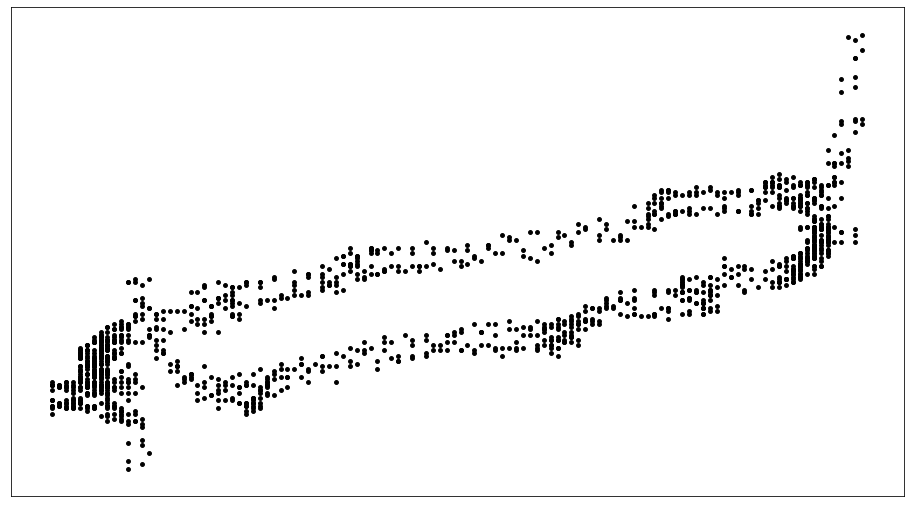

In [8]:
fso = []   #field scanning output
for i in range(1400):
    fso.append(float(data1['ch1'][i+1]))
do = []  #demodulation output
for i in range(1400):
    do.append(float(data1['ch2'][i+1]))
    
plt.subplots(figsize = (16, 9))
plt.scatter(fso, do, c = 'k', s = 15)###图像不太好，废弃
plt.xticks([])
plt.yticks([])
plt.show()

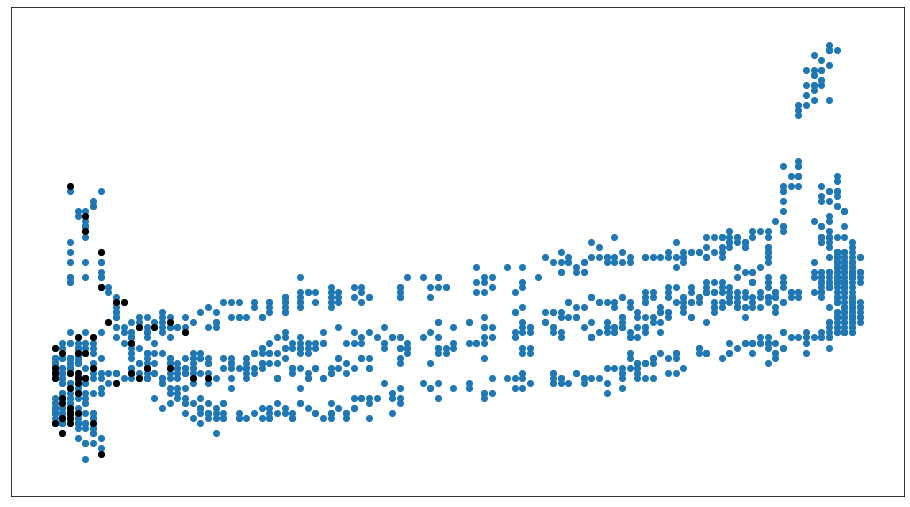

In [9]:
fso = []   #field scanning output
for i in range(1400):
    fso.append(float(data2['ch1'][i+1]))
do = []  #demodulation output
for i in range(1400):
    do.append(float(data2['ch2'][i+1]))
    
plt.subplots(figsize = (16, 9))
plt.scatter(fso, do)
plt.scatter(fso[20:75], do[20:75], c = 'k')

plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
from scipy import fftpack

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


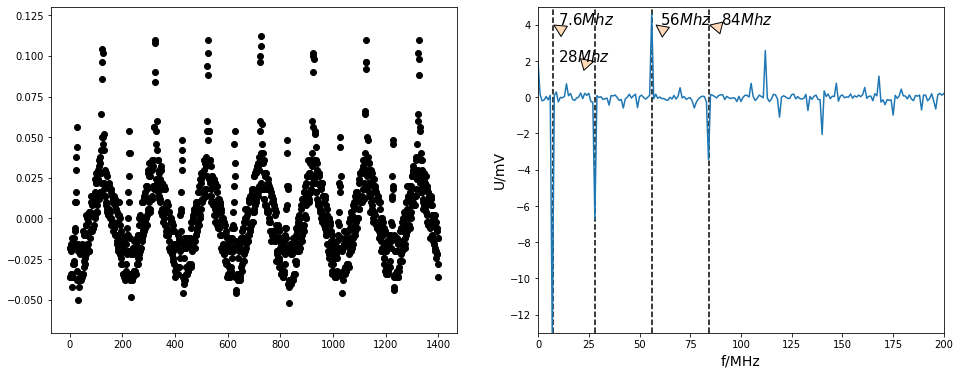

In [46]:
x = np.linspace(0, 1400, 1400)
fig, ax = plt.subplots(1, 2,figsize = (16, 6))
#plt.scatter(x, fso)
ax[0].scatter(x, do, c = 'k')

y = fftpack.fft(do)
ax[1].plot(y)
ax[1].set_xlabel(r"f/MHz", fontsize = 14)
ax[1].set_ylabel(r"U/mV", fontsize = 14)
ax[1].set_xlim(0, 200)
ax[1].set_ylim(-13, 5)
ax[1].vlines(7.6, -13, 5, ls = '--')
ax[1].annotate(r'$7.6Mhz$', fontsize = 15, xytext = (10, 4), xy=(7.6, 4),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})
ax[1].vlines(28, -13, 5, ls = '--')
ax[1].annotate(r'$28Mhz$', fontsize = 15, xytext = (10, 2), xy=(28, 2),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})
ax[1].vlines(56, -13, 5, ls = '--')
ax[1].annotate(r'$56Mhz$', fontsize = 15, xytext = (60, 4), xy=(58, 4),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})
ax[1].vlines(84, -13, 5, ls = '--')
ax[1].annotate(r'$84Mhz$', fontsize = 15, xytext = (90, 4), xy=(84, 4),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})

#plt.xticks([])
#plt.yticks([])
plt.show()

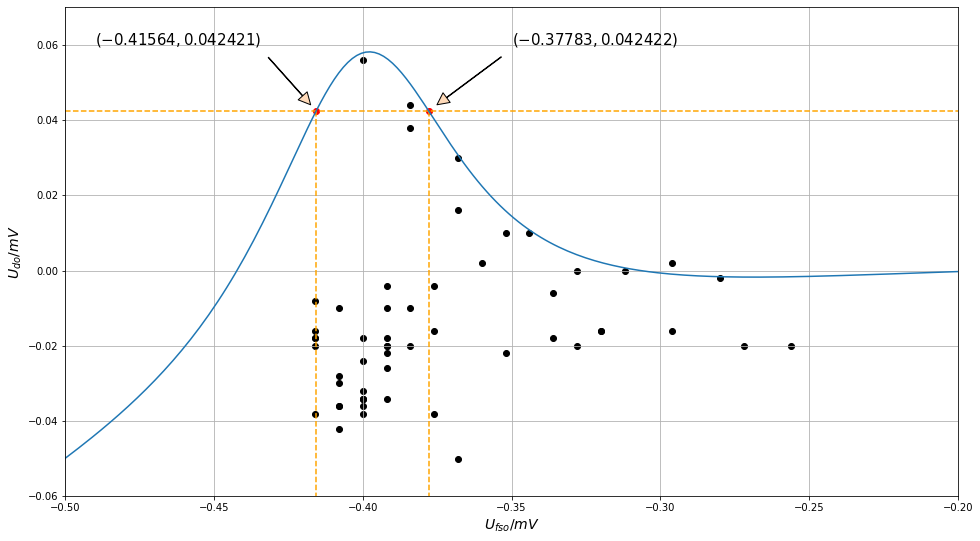

In [10]:
#背景信号与洛伦兹线形拟合共振峰
f = lambda x:  0.5*x**3 + 0.001*x**2 + 0.002*x +0.0005  + 0.09/(1+600*(x+0.4)**2)  
x_dense = np.linspace(-0.50, -0.20, 200)

#实际测量散点
plt.subplots(figsize = (16, 9))
plt.scatter(fso[20:75], do[20:75], c = 'k')

#半高宽(U = 0.42426)
plt.scatter(-0.41564 ,f(-0.41564), c = 'r')
plt.scatter(-0.37783, f(-0.37783), c = 'r')
#x_1 = -0.41564; x_2 = -0.37783

plt.vlines(-0.41564, 0.04246, -0.06,  ls = '--', colors = 'orange')
plt.vlines(-0.37783, 0.04246, -0.06,  ls = '--', colors = 'orange')
plt.hlines(0.04246, -0.5, -0.2,  ls = '--', colors = 'orange')
plt.annotate(r'$(-0.41564, 0.042421)$', fontsize = 15, xytext = (-0.49, 0.06), xy=(-0.41564, 0.042421),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})
plt.annotate(r'$(-0.37783, 0.042422)$', fontsize = 15, xytext = (-0.35, 0.06), xy=(-0.37783, 0.042422),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})

plt.plot(x_dense, f(x_dense))#线图要在散点图之后绘制否则自动分屏

plt.xlim(-0.5, -0.2)
plt.ylim(-0.06, 0.07)
plt.xlabel(r"$U_{fso}/mV$", fontsize = 14)
plt.ylabel(r"$U_{do}/mV$", fontsize = 14)
plt.grid()
plt.show()
###有些测量误差，导致峰值在一边突降，使得拟合只能顾及一边

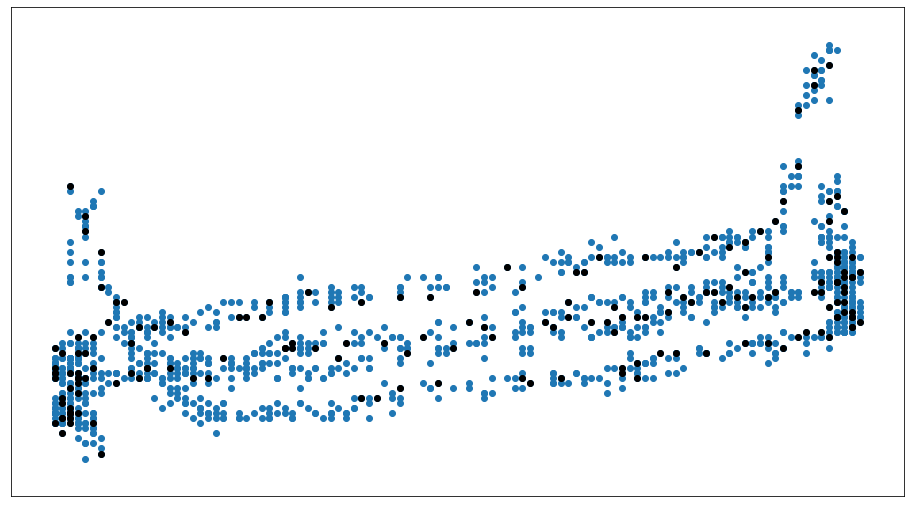

In [11]:
fso = []   #field scanning output
for i in range(1400):
    fso.append(float(data2['ch1'][i+1]))
do = []  #demodulation output
for i in range(1400):
    do.append(float(data2['ch2'][i+1]))
    
plt.subplots(figsize = (16, 9))
plt.scatter(fso, do)
plt.scatter(fso[20:200], do[20:200], c = 'k')

plt.xticks([])
plt.yticks([])
plt.show()

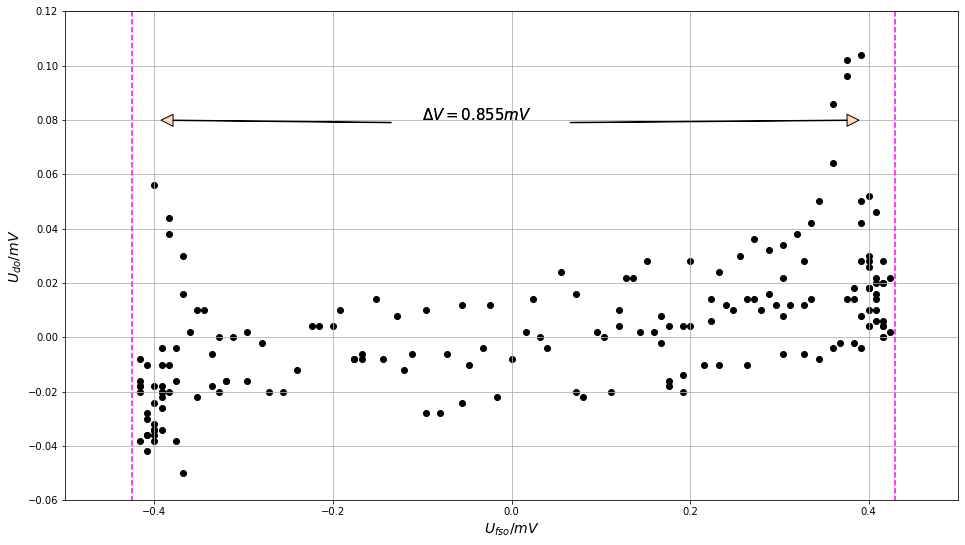

In [12]:
plt.subplots(figsize = (16, 9))
plt.scatter(fso[20:200], do[20:200], c = 'k')

plt.vlines(-0.425, 0.12, -0.06,  ls = '--', colors = 'magenta')
plt.vlines(0.43, 0.12, -0.06,  ls = '--', colors = 'magenta')
plt.annotate(r'$\Delta V = 0.855mV$', fontsize = 15, xytext = (-0.1, 0.08), xy=(-0.425, 0.08),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})
plt.annotate(r'$\Delta V = 0.855mV$', fontsize = 15, xytext = (-0.1, 0.08), xy=(0.43, 0.08),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'peachpuff'})

plt.xlim(-0.5, 0.5)
plt.ylim(-0.06, 0.12)
plt.xlabel(r"$U_{fso}/mV$", fontsize = 14)
plt.ylabel(r"$U_{do}/mV$", fontsize = 14)
plt.grid()
plt.show()

不同浓度弛豫时间比较

In [20]:
df3 = pd.read_csv(r'C:\Users\31260\Desktop\核磁共振\选做4\低浓度.csv')
data3 = df3.head(1500)
df4 = pd.read_csv(r'C:\Users\31260\Desktop\核磁共振\选做4\高浓度.csv')
data4 = df4.head(1500)

In [121]:
lc = [] #low concentration 
for i in range(1400):
    lc.append(float( data3['ch1'][i+1]))

hc = []  #high concentration
for i in range(1400):
    hc.append(float( data4['ch1'][i+1]))

x = []
for i in range(1400):
    x.append(int(data4['X'][i+1]))

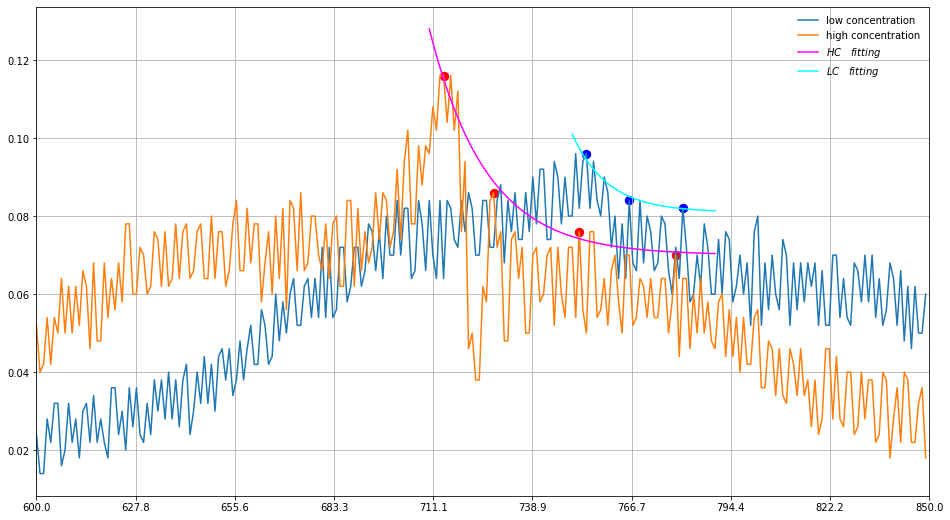

In [221]:
delta = []
for i in range(1400):
    delta.append(0.05 * fso[i] + 0.045)

f_expection = lambda x: np.sin(1e-6 * x)
    
plt.subplots(figsize = (16, 9))
plt.plot(x[600:850], lc[600:850], label = 'low concentration')
plt.plot(x[600:850], hc[600:850], label = 'high concentration')

#高浓度点
plt.scatter(x[714], hc[714], c = 'red', s = 70)
plt.scatter(x[728], hc[728], c = 'red', s = 70)
plt.scatter(x[752], hc[752], c = 'red', s = 70)
plt.scatter(x[779], hc[779], c = 'red', s = 70)

#低浓度点
plt.scatter(x[754], lc[754], c = 'blue', s = 70)
plt.scatter(x[766], lc[766], c = 'blue', s = 70)
plt.scatter(x[781], lc[781], c = 'blue', s = 70)

#拟合
f_hc = lambda x: 0.058 * np.exp(-(x-710)/16) + 0.07
###乘以0.058是因为e指数在x =0时是1但是此处从大概0.12开始（已经在零点处加了0.07）
###后面加了0.07是因为指数衰减极限大概到0.07
###减去710是因为拟合从x = 710点开始
####所以弛豫指数只有16，上述调整项均不用考虑，直接在报告要求的计算中当零点开始处理

f_lc = lambda x: 0.02 * np.exp(-(x-750)/10) + 0.081
###数据利用解释同上

x_den_hc = np.linspace(710, 790, 80)
x_den_lc = np.linspace(750, 790, 40)
plt.plot(x_den_hc, f_hc(x_den_hc), c = 'magenta', label = r"$HC \quad fitting$")
plt.plot(x_den_lc, f_lc(x_den_lc), c = 'cyan', label = r"$LC \quad fitting$")

plt.xticks(np.linspace(600, 850, 10))
plt.xlim(600, 850)
plt.legend(frameon = False)
plt.grid()
plt.show()

In [177]:
hc[714]

0.116

([], <a list of 0 Text xticklabel objects>)

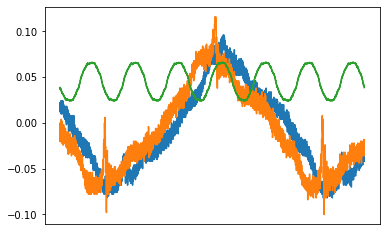

In [59]:
plt.plot(x, lc, label = 'low concentration')
plt.plot(x, hc, label = 'high concentration')
plt.plot(x, delta)

plt.xticks([`])